In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split

In [27]:
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [28]:
# handle missing value with average of features
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

In [29]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [30]:
X = df.drop("Potability", axis=1).values
y = df["Potability"].values
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2293, 9)
X_test (983, 9)
y_train (2293,)
y_test (983,)


In [31]:
# min-max normalization
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)

In [32]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the models
models = [("SVM", SVC(probability=True)),
          ("KNN", KNeighborsClassifier()),
          ("LR", LogisticRegression(solver='liblinear', random_state=0)),
          ("NB", GaussianNB()),
          ("DTC", DecisionTreeClassifier(max_depth = 3)),
          ("RF", RandomForestClassifier()),
          ("AdaBoost", AdaBoostClassifier())]

finalResults = []
cmList = []

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    model_result = model.predict(X_test)
    score = accuracy_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)
    finalResults.append((name, score))
    cmList.append((name, cm))

finalResults

[('SVM', 0.6052899287894201),
 ('KNN', 0.5279755849440488),
 ('LR', 0.6052899287894201),
 ('NB', 0.6256358087487284),
 ('DTC', 0.62970498474059),
 ('RF', 0.6622583926754833),
 ('AdaBoost', 0.6073245167853509)]

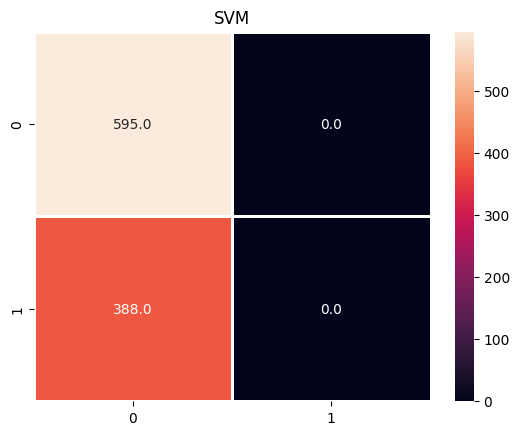

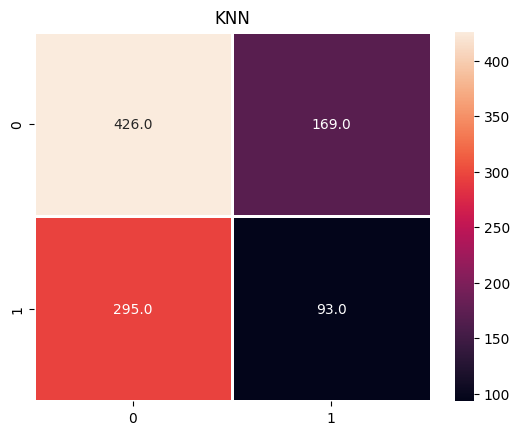

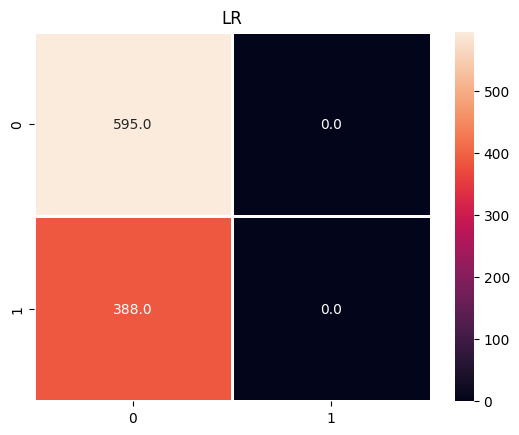

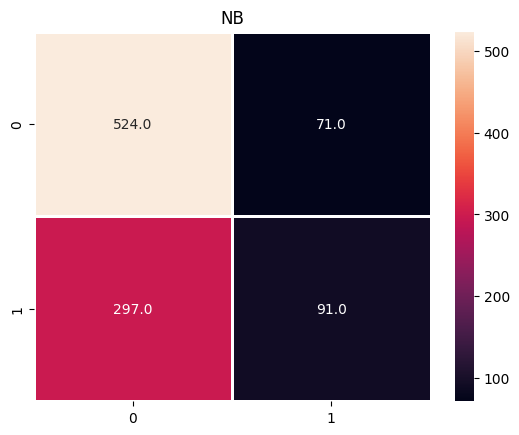

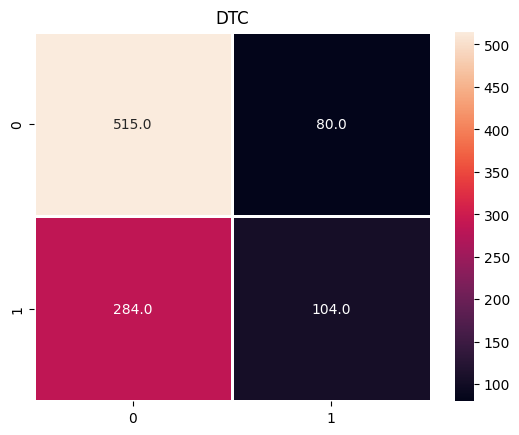

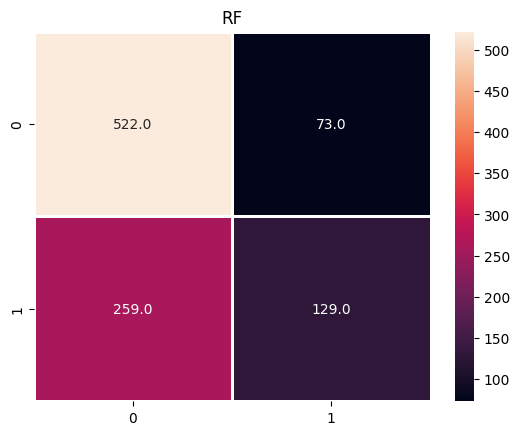

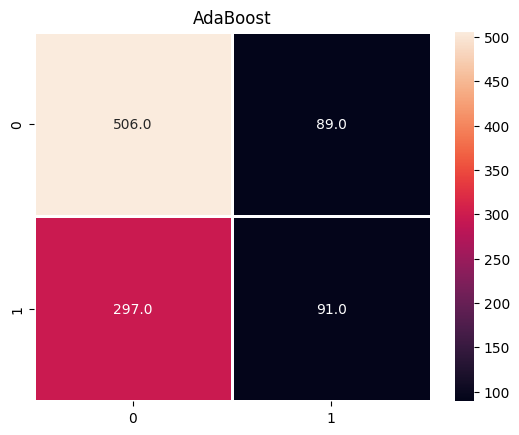

In [33]:
for name, i in cmList:
    plt.figure()
    sns.heatmap(i, annot=True, linewidths = 0.8, fmt=".1f")
    plt.title(name)
    plt.show()